<p style="font-family: 'Arial', sans-serif; font-size: 64px; font-weight: bold; text-align: center; color: #ffcc00; background-color: #1c1c1c; padding: 30px; border: 3px solid #444; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">NUEXUS Technologies</p>

<p style="font-family: 'Arial', sans-serif; font-size: 48px; font-weight: bold; text-align: center; color: #ffcc00; background-color: #1c1c1c; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">Artificial Intelligence Internship Program</p>

<p style="font-family: 'Arial', sans-serif; font-size: 24px; font-weight: normal; text-align: justify; color: #ffffff; background-color: #1c1c1c; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
  <strong>Week 1</strong> 
  <br>
  <strong>Task 1</strong>
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 24px; font-weight: normal; text-align: justify; color: #ffffff; background-color: #1c1c1c; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
  <strong>Introduction of Group C</strong>
  <br>
  <em>Leader</em>: Muhammad Rizwan Khan
  <br>
  Zia ul Islam Mughal (NUAI242510003)
  <br>
  Muhammad Qasim
</p>


<p style="font-family: 'Arial', sans-serif; font-size: 64px; font-weight: bold; text-align: center; color: #ffcc00; background-color: #1c1c1c; padding: 30px; border: 3px solid #444; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">Predict Employee Attrition</p>

<p style="font-family: 'Arial', sans-serif; font-size: 24px; font-weight: normal; text-align: justify; color: #ffffff; background-color: #1c1c1c; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
This project aims to predict employee attrition by analyzing key factors that contribute to turnover. Through predictive modeling, we can identify employees at risk of leaving the organization. This enables proactive interventions to retain valuable talent, reduce turnover costs, and boost overall employee satisfaction and productivity.
</p>

# **Load Packages**

In [1]:
# Data Processing Packages
import pandas as pd 
import numpy as np 

# Data Visualization Packages
import matplotlib.pyplot as plt 
import seaborn as sns

# For ML Models

import sklearn as sk 
import xgboost 

# Model 
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model Evalution import preceison , recall , f1 score , ROU AUC 
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score

# For operating system functions 
import os

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# **Import Data**

In [2]:
df = pd.read_csv("dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# **Exploratory Data Analysis (EDA)**

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [5]:
df.rename(columns={'EmployeeNumber': 'EmployeeID', 'MonthlyIncome': 'Salary', 'YearsAtCompany': 'Tenure', 'PerformanceRating': 'PerformanceRate', 'YearsSinceLastPromotion': 'PromotionHistory', 'TrainingTimesLastYear': 'TrainingHours', 'YearsWithCurrentManager': 'ManagerTenure'}, inplace=True)


In [6]:
df.drop(['BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'YearsInCurrentRole','YearsWithCurrManager','Over18',"EmployeeCount", 'EmployeeID'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1462 non-null   float64
 1   Attrition         1470 non-null   object 
 2   Department        1470 non-null   object 
 3   Gender            1470 non-null   object 
 4   JobRole           1470 non-null   object 
 5   JobSatisfaction   1470 non-null   int64  
 6   Salary            1468 non-null   float64
 7   PerformanceRate   1470 non-null   int64  
 8   TrainingHours     1470 non-null   int64  
 9   WorkLifeBalance   1470 non-null   int64  
 10  Tenure            1470 non-null   int64  
 11  PromotionHistory  1470 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 137.9+ KB


# Handle Missing Values

In [8]:
# Check Missing Values
print(df.isnull().sum())

Age                 8
Attrition           0
Department          0
Gender              0
JobRole             0
JobSatisfaction     0
Salary              2
PerformanceRate     0
TrainingHours       0
WorkLifeBalance     0
Tenure              0
PromotionHistory    0
dtype: int64


In [9]:
#  Calculate mean of age column 

mean_age = df['Age'].mean()

#  Replace missing values in age column with mean age 
df['Age'].fillna(mean_age, inplace=True) 


# Remove whole age column 

# df.drop('Age', axis=1, inplace=True)



In [10]:
# Check  again Missing Values

print(df.isnull().sum())

Age                 0
Attrition           0
Department          0
Gender              0
JobRole             0
JobSatisfaction     0
Salary              2
PerformanceRate     0
TrainingHours       0
WorkLifeBalance     0
Tenure              0
PromotionHistory    0
dtype: int64


# Duplicate Values

In [11]:
# Find the count of Duplicate values in dataset 

duplicate = df.duplicated().sum()
print(f"Total Duplicate Values: {duplicate}")

Total Duplicate Values: 0


# Outliers 

In [12]:
# Convert 'Yes' to 1 and 'No' to 0 in 'Attrition' column
df["Attrition"] = df["Attrition"].apply(lambda x : 1 if x == 'Yes' else 0)

<Axes: xlabel='Attrition', ylabel='Age'>

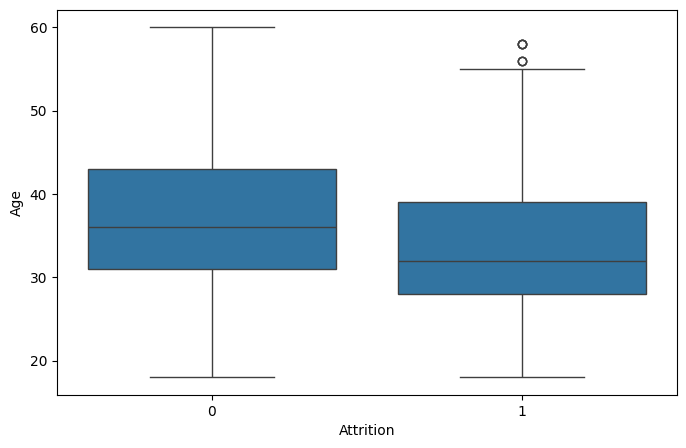

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition',y='Age',data=df)

<Axes: xlabel='Attrition', ylabel='Salary'>

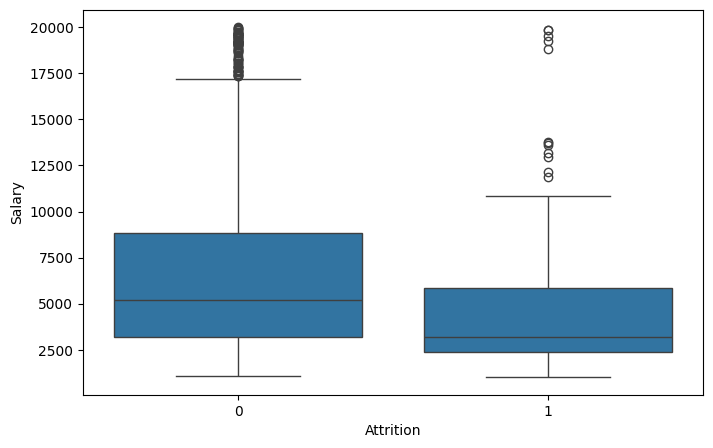

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition',y='Salary',data=df)



<Axes: xlabel='Attrition', ylabel='Tenure'>

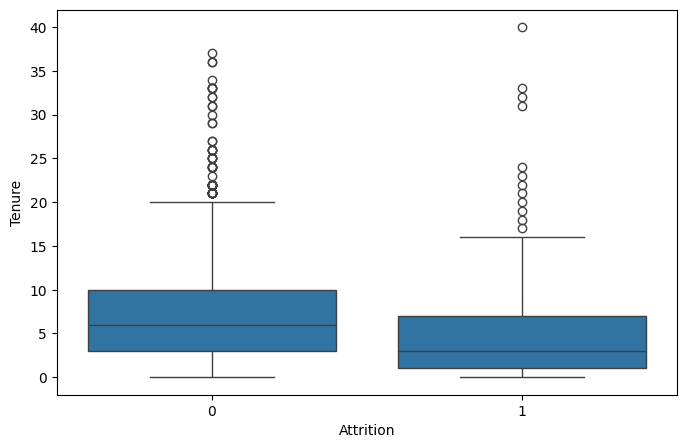

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition',y='Tenure',data=df)

<Axes: xlabel='Attrition', ylabel='TrainingHours'>

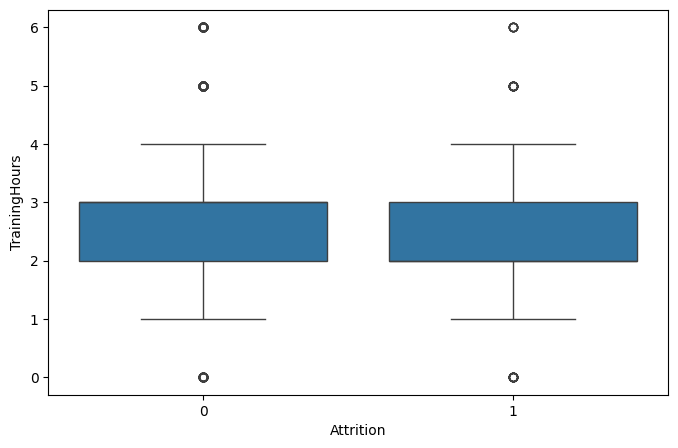

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition',y='TrainingHours',data=df)

In [17]:
# Remove outliers from age , salary , tensure , Traing hours 

Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Age >= Q1 - 1.5*IQR) & (df.Age <= Q3 + 1.5*IQR)]    

Q1 = df.Salary.quantile(0.25)

Q3 = df.Salary.quantile(0.75)

IQR = Q3 - Q1

df = df[(df.Salary >= Q1 - 1.5*IQR) & (df.Salary <= Q3 + 1.5*IQR)]

Q1 = df.Tenure.quantile(0.25)

Q3 = df.Tenure.quantile(0.75)

IQR = Q3 - Q1

df = df[(df.Tenure >= Q1 - 1.5*IQR) & (df.Tenure <= Q3 + 1.5*IQR)]

Q1 = df.TrainingHours.quantile(0.25)

Q3 = df.TrainingHours.quantile(0.75)

IQR = Q3 - Q1

df = df[(df.TrainingHours >= Q1 - 1.5*IQR) & (df.TrainingHours <= Q3 + 1.5*IQR)]


# Correlation Analysis 

In [18]:
df.corrwith(df.Attrition, axis = 0 ,numeric_only=True ).sort_values(ascending = False).head(10)

Attrition           1.000000
TrainingHours       0.018118
PromotionHistory    0.001107
PerformanceRate    -0.002699
WorkLifeBalance    -0.054808
JobSatisfaction    -0.104371
Age                -0.144869
Salary             -0.152201
Tenure             -0.162730
dtype: float64

<Figure size 800x500 with 0 Axes>

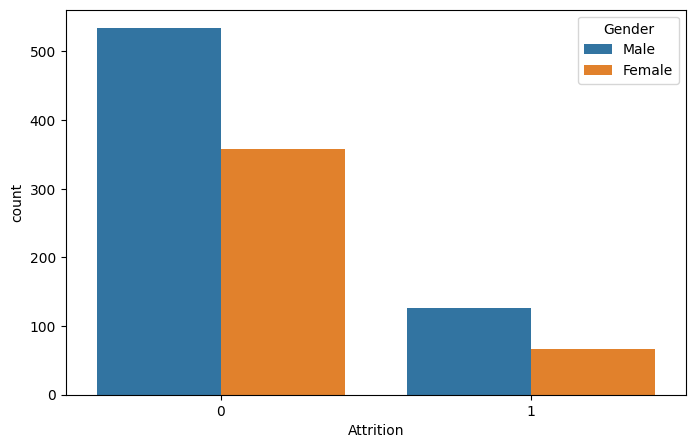

<Figure size 800x500 with 0 Axes>

In [19]:
# comparing the people who leave company of basis of history and also compare with gender 

plt.figure(figsize=(8,5))

sns.countplot(x='Attrition', hue='Gender', data=df)
plt.figure(figsize=(8,5))

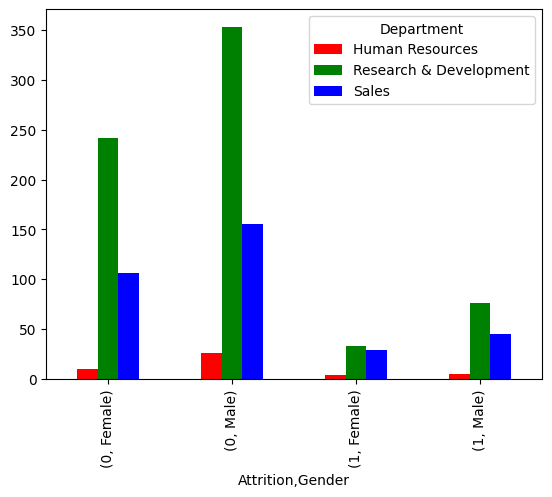

In [20]:
df.groupby(['Attrition', 'Gender'])['Department'].value_counts().unstack().plot.bar(color=['red', 'green', 'blue'])

plt.show()


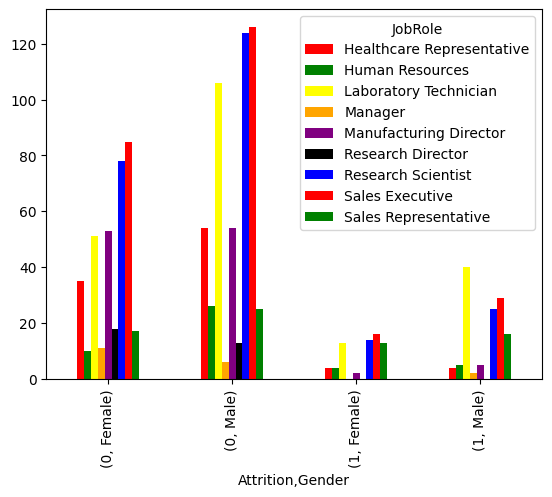

In [21]:
df.groupby(['Attrition', 'Gender'])['JobRole'].value_counts().unstack().plot.bar(color=['red', 'green','yellow', 'orange','purple', 'black', 'blue'])

plt.show()

# Standaridization 

In [22]:
# standaridization of categorical dataype columns 

cat_cols = df.columns[df.dtypes=='object']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [39]:
df.columns

Index(['Age', 'Attrition', 'JobSatisfaction', 'Salary', 'PerformanceRate',
       'TrainingHours', 'WorkLifeBalance', 'Tenure', 'PromotionHistory',
       'Department_Research & Development', 'Department_Sales', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative'],
      dtype='object')

In [23]:
df.head()

,Age,Attrition,JobSatisfaction,Salary,PerformanceRate,TrainingHours,WorkLifeBalance,Tenure,PromotionHistory,Department_Research & Development,Department_Sales,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
1,49.0,0,2,5130.0,4,3,3,10,1,True,False,True,False,False,False,False,False,True,False,False
2,37.0,1,3,2090.0,3,3,3,0,0,True,False,True,False,True,False,False,False,False,False,False
3,33.0,0,3,2909.0,3,3,3,8,3,True,False,False,False,False,False,False,False,True,False,False
4,27.0,0,2,3468.0,3,3,3,2,2,True,False,True,False,True,False,False,False,False,False,False
5,32.0,0,4,3068.0,3,2,2,7,3,True,False,True,False,True,False,False,False,False,False,False


# Data Visulization 


**Correlation**

<Axes: >

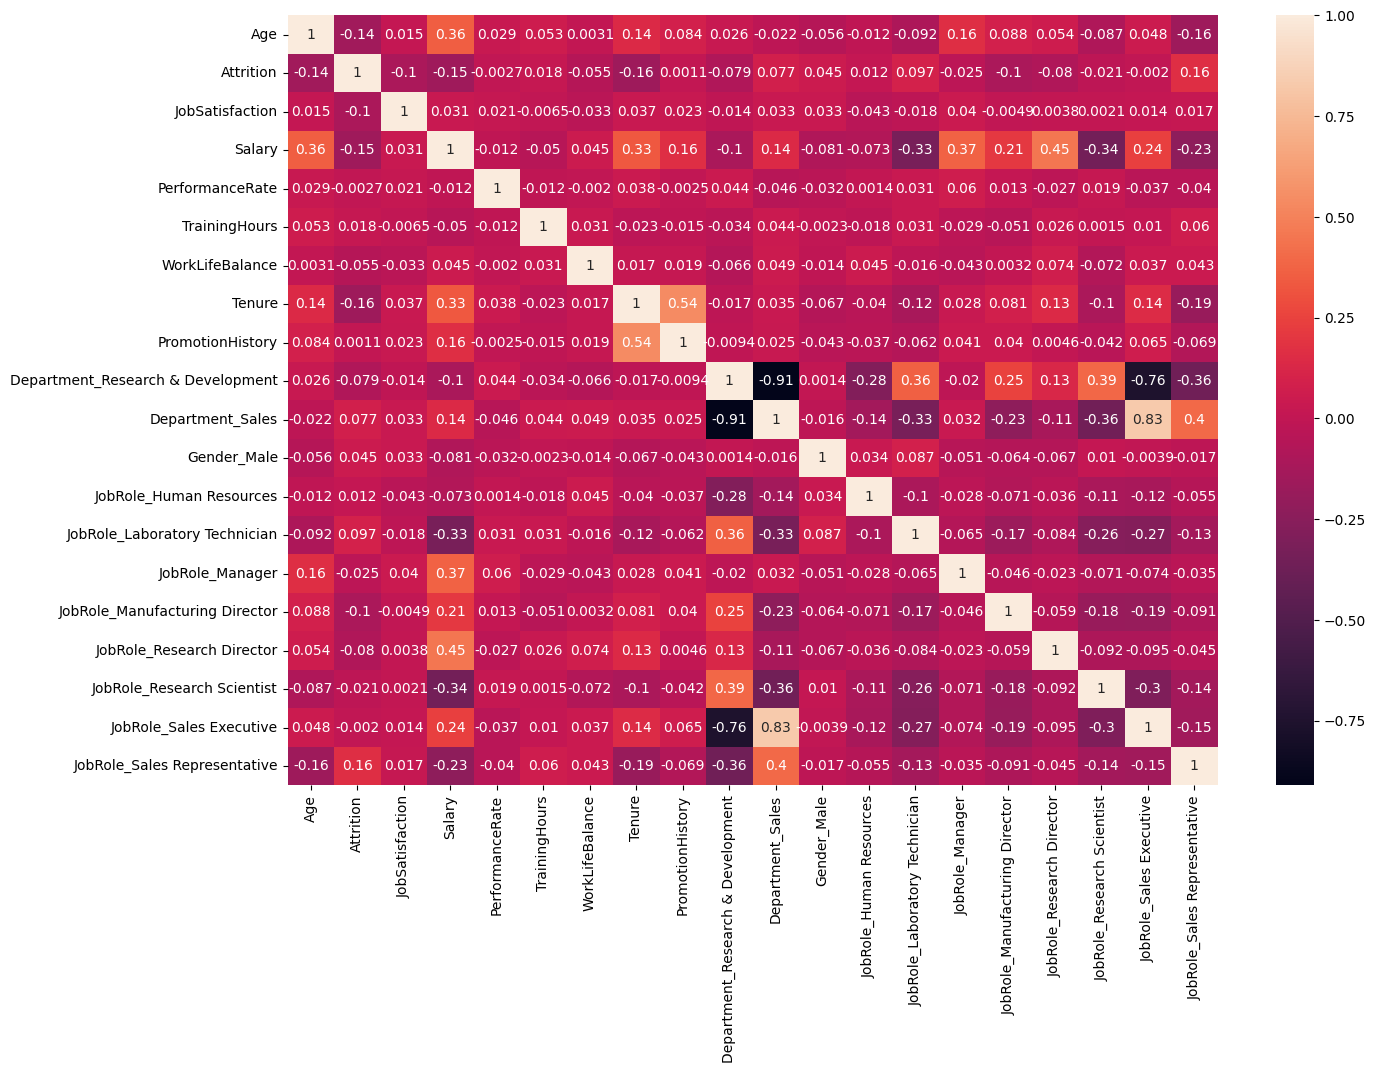

In [24]:
# correlation heatmap 

plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True)

# Normalize Numerical Columns 

In [25]:
def convert_bool_to_int(df):
    for col in df.columns:
        if df[col].dtype == bool:
            df[col] = df[col].apply(lambda x: 1 if x == True else 0)
    return df

df = convert_bool_to_int(df)
df.head()


,Age,Attrition,JobSatisfaction,Salary,PerformanceRate,TrainingHours,WorkLifeBalance,Tenure,PromotionHistory,Department_Research & Development,Department_Sales,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
1,49.0,0,2,5130.0,4,3,3,10,1,1,0,1,0,0,0,0,0,1,0,0
2,37.0,1,3,2090.0,3,3,3,0,0,1,0,1,0,1,0,0,0,0,0,0
3,33.0,0,3,2909.0,3,3,3,8,3,1,0,0,0,0,0,0,0,1,0,0
4,27.0,0,2,3468.0,3,3,3,2,2,1,0,1,0,1,0,0,0,0,0,0
5,32.0,0,4,3068.0,3,2,2,7,3,1,0,1,0,1,0,0,0,0,0,0


In [26]:
df.head()

,Age,Attrition,JobSatisfaction,Salary,PerformanceRate,TrainingHours,WorkLifeBalance,Tenure,PromotionHistory,Department_Research & Development,Department_Sales,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
1,49.0,0,2,5130.0,4,3,3,10,1,1,0,1,0,0,0,0,0,1,0,0
2,37.0,1,3,2090.0,3,3,3,0,0,1,0,1,0,1,0,0,0,0,0,0
3,33.0,0,3,2909.0,3,3,3,8,3,1,0,0,0,0,0,0,0,1,0,0
4,27.0,0,2,3468.0,3,3,3,2,2,1,0,1,0,1,0,0,0,0,0,0
5,32.0,0,4,3068.0,3,2,2,7,3,1,0,1,0,1,0,0,0,0,0,0


### **Separating the Feature and Target Variable**

In [27]:
X = df.drop(['Attrition'],axis = 1 )
y = df['Attrition']

### **Scaling the data values to standardize the range of independent variables**

In [28]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

### **Split the data into Training set and Testing set**

In [29]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

### **Function definition**

This code defines a function named `train_and_evaluate_model` that takes training and testing data along with a model as input. Here's a breakdown of what the function does:





In [30]:

def train_and_evaluate_model(x_train, y_train, x_test, y_test, Model):
    # Train the model
    Model.fit(x_train, y_train)
    
    # Make predictions on the testing data
    y_pred = Model.predict(x_test)
    y_pred_proba = Model.predict_proba(x_test)[:, 1] if hasattr(Model, "predict_proba") else None
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Print the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    
    # Return the metrics
    return {
        "accuracy": accuracy,
        "f1_score": f1,
        "precision": precision,
        "recall": recall,
        "roc_auc": roc_auc
    }

### **PERFORM PREDICTIONS USING MACHINE LEARNING ALGORITHMS**

In [31]:
# from sklearn.tree import DecisionTreeClassifier


# Model = "DecisionTreeClassifier()"

# model = DecisionTreeClassifier()

# train_and_evaluate_model(X_train, y_train, X_test, y_test, model)


In [32]:
# from sklearn.linear_model import  LogisticRegression

# Model = "Logistic Regression()"

# model = LogisticRegression()

# train_and_evaluate_model(X_train, y_train, X_test, y_test, model)

In [45]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Model = "RandomForestClassifier()"

model = RandomForestClassifier()

train_and_evaluate_model(X_train, y_train, X_test, y_test, model)



Accuracy: 0.7834
F1 Score: 0.0408
Precision: 0.1111
Recall: 0.0250
ROC-AUC: 0.6227


{'accuracy': 0.783410138248848,
 'f1_score': 0.04081632653061224,
 'precision': 0.1111111111111111,
 'recall': 0.025,
 'roc_auc': 0.6227401129943504}

In [34]:
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model = "GradientBoostingClassifier()"

# model = GradientBoostingClassifier()

# train_and_evaluate_model(X_train, y_train, X_test, y_test, model)

In [42]:
from sklearn.svm import SVC

Model = "SVC()"

# Train SVC with probability=True
model = SVC(probability=True)

train_and_evaluate_model(X_train, y_train, X_test, y_test, model)

Accuracy: 0.7972
F1 Score: 0.0833
Precision: 0.2500
Recall: 0.0500
ROC-AUC: 0.5638


{'accuracy': 0.7972350230414746,
 'f1_score': 0.08333333333333333,
 'precision': 0.25,
 'recall': 0.05,
 'roc_auc': 0.5638418079096046}

# **Compare Models**

In [36]:
# # compare the results of model by ploting graph 

# results = []

# for Model in [DecisionTreeClassifier(), LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), SVC()]:
#     model_name = Model.__class__.__name__
#     results.append(train_and_evaluate_model(X_train, y_train, X_test, y_test, Model))
#     print("\n")
#     print(f"Results for {model_name}:")
#     print("-" * 50)
#     print("\n")
    
    

In [43]:
# Check if 'models' directory exists, if not, create it
if not os.path.exists('models'):
    os.makedirs('models')


In [46]:
# Save model Random forest classifier 

from joblib import dump, load

dump(model, 'models/random_forest_classifier.joblib')

['models/random_forest_classifier.joblib']

In [40]:
dump(scale, 'models/scaler.joblib')

['models/scaler.joblib']